Colab 환경 설정하기

In [1]:
!pip install gluonnlp pandas tqdm
!pip install mxnet
!pip install sentencepiece==0.1.91
!pip install transformers==4.8.2
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp38-cp38-linux_x86_64.whl size=688997 sha256=9bb13c3287356586c5706a5cdbfabd745777a301c89099af2b489508a8863f39
  Stored in directory: /root/.cache/pip/wheels/b6/93/9d/2237550c409eb3ed725d6302b7897ddd9a037b40cef66dcd9c
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

github에서 KoBERT 파일 로드 및 KoBERT 모델 불러오기

In [2]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-qhu4nbo9/kobert-tokenizer_09d36c72d5c14be59fa2de6eb0308017
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-qhu4nbo9/kobert-tokenizer_09d36c72d5c14be59fa2de6eb0308017
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
  Created wheel for kobert_tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4648 sha256=4d942ab8d378f6d85d80da0e91ec7db95cd10d1d7363ad7045a8ebd65cf8ee0b
  Stored in directory: /tmp/pip-ephem-wheel-cache-8tnl43ch/wheels/f7/cb/29/1a737fe71e5108dc30b04ea4a990f78ed271fa537aaf3fce7c
Successfully built kobert_tokenizer


In [3]:
!pip install git+https://git@github.com/SKTBrain/KoBERT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT to /tmp/pip-req-build-ew1f5r8a
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/SKTBrain/KoBERT' /tmp/pip-req-build-ew1f5r8a
  Resolved https://****@github.com/SKTBrain/KoBERT to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 103.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 KB 10.1 MB/s et

In [4]:
import os
from zipfile import ZipFile
import torch
from transformers import BertModel
import gluonnlp as nlp

from kobert import download, get_tokenizer

def get_kobert_model(model_path, vocab_file, ctx="cpu"):
        bertmodel = BertModel.from_pretrained(model_path, return_dict=False)
        device = torch.device(ctx)
        bertmodel.to(device)
        bertmodel.eval()
        vocab_b_obj = nlp.vocab.BERTVocab.from_sentencepiece(
            vocab_file, padding_token="[PAD]"
        )
        return bertmodel, vocab_b_obj

In [5]:
from kobert_tokenizer import KoBERTTokenizer

tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel, vocab = get_kobert_model('skt/kobert-base-v1',tokenizer.vocab_file)

Downloading:   0%|          | 0.00/371k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/244 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/432 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/535 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/369M [00:00<?, ?B/s]

필요한 라이브러리 불러오기

In [6]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm,tqdm_notebook
import pandas as pd
import random
import matplotlib.pyplot as plt

# transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup
from transformers import BertModel

# GPU사용시
device=torch.device('cuda:0')

데이터셋 불러오기

In [33]:
data=pd.read_csv('./Lyrics_knu_kosac.csv',encoding='utf-8')
data

,Lyrics,label,y,knu,kosac,result,pos
0,아침에 일어나 너에게 짧은 인사를 보낸다 아무리 멀리 떨어져 있어도 생각하고 늦은 ...,0,1,0.625000,0.500000,0.562500,1
1,맛있었다 고 했던 살구빛 샐러드 맛있어서 먹고 싶어 좋아했던 것들을 나에게 자그마한...,0,1,0.000000,0.437500,0.218750,0
2,마주치는 눈빛에 아기 아기 왠지 어색해 대체 고개를 숙여봐도 발끝에 맘이 설레 두근...,0,1,0.571429,0.571429,0.571429,1
3,어깨동무까진 괜찮아 치마 손잡는 건 위험해 잘 자란 메세 진 괜찮아그래도 자냐는 메...,0,1,0.700000,0.416667,0.558333,1
4,햇살이 가득 그댈 향한 가벼운 발걸음 콧노래 부르며 쇼윈도에 비친 모습을 한번 점검...,0,1,0.857143,0.545455,0.701299,1
...,...,...,...,...,...,...,...
741,반쯤 미쳐가는 망가져 삶넌 내게서 지워가고 부숴버려라 추락한 눈앞에서 멀어지는 속도...,3,0,0.600000,0.476190,0.538095,1
742,무궁화 꽃이 피었습니다 빼고 멈춰지담 꽃이 피었습니다 현아 빼고 비켜 도망가 너나 ...,3,0,0.571429,0.384615,0.478022,0
743,아예 아예 아예 이렇게 감을 못 잡는 말을 하는지 모르겠어 뭐야 싱긋싱긋 웃으며 치...,3,0,0.750000,0.750000,0.750000,1
744,나쁜 계집애 나난 나쁜 계집애 나쁜 계집애 모든 여자가 고난 나난 모든 여자가 곳 ...,3,0,0.555556,0.666667,0.611111,1


In [37]:
neg=data[data['pos']==0].reset_index(drop=True)
a=neg[neg['label']==1]
b=neg[neg['label']==3]
df=pd.concat([a,b])

In [39]:
neg['label'].value_counts()

2    121
1     71
0     50
3     50
Name: label, dtype: int64

In [11]:
df['Label'].value_counts()

0    71
1    50
Name: Label, dtype: int64

In [9]:
def new_label(df):
  if df['label']==1:
    return '0' #슬픔
  else:
    return '1' #분노

In [10]:
df['Label']=df.apply(new_label,axis=1)
df.drop(['y','result','pos','knu','kosac','label'],axis=1,inplace=True)
df

,Lyrics,Label
171,우리에게 남은 질문은 없었어할 말도 없고 어색한 공기에 필요 없는 말도 했어 평소 ...,0
172,너에게 사람이 생겼다는 소식을 듣게 되었어난 하루 종일 복잡한 마음이라서 아무것도 ...,0
173,더는 애쓰지 않아도 돼 억지로 끌고 가는 마음 잘 알고 있었지만 믿고 싶지 않았어멀...,0
174,아직 꿈을 가죠 밤하늘 희미한 달빛처럼 눈부셨던 기억 속에 사람 어렴풋이 생각이 나...,0
175,마음을 한 번만 만져줘요 온종일 이렇게 서늘해요 겨울보다 차가운 하늘 아래 내가서 ...,0
...,...,...
287,물러서야 합니다 어델 어델 감히 누구라고 젖혀 이쯤에서 물러나고 입 닫는 좋을 아님...,1
288,거짓말 거짓말 거짓말 밤에 대체 연락해 아는 여자 동생들 많네 저리 가요 친구가 길...,1
289,알아봐 티브이쇼 챔피언 랩 스타 셀럽이자 패시야 핸드폰은 종일 울려 필요해 무음 부...,1
290,무궁화 꽃이 피었습니다 빼고 멈춰지담 꽃이 피었습니다 현아 빼고 비켜 도망가 너나 ...,1


In [12]:
# 랜덤한 순서
random.seed(111)
result=[]
for lyric in df['Lyrics']:
    sub=lyric.split(' ')
    result.append(random.sample(sub,len(sub)))
    
lyrics=[]
for word_lst in result:
    sub=' '.join(word_lst)
    lyrics.append(sub)

label=df['Label'].tolist()
plus=pd.DataFrame({'Lyrics':lyrics,'Label':label})
plus

,Lyrics,Label
0,그러지 걷자 못해 말이라도 내려놓을게 고마웠었어 지나쳐 아파 너만 존재해서 띠며 속...,0
1,시절 속 쉽게 못하고 있지만 없다 사진 없었어날 함께인 시절 한 데려가는데 끝났다 ...,0
2,확신할수록 애쓰지 멀어지는 없단 확신할수록 놓으면 마지막 건지 내려놓을 텅 사랑했나...,0
3,희미한 아래 수 속에 하늘 사람 바다 느끼고 있다는 그대와 바다 두려운 손 느끼고 ...,0
4,죠이게 아득하다 마음을 한 겨울보다 닿을게 같았던 아름답고 아름다웠던 가슴 이렇게 ...,0
...,...,...
116,호의로 찾니 좋을 다가와 추억 저울질로 끼를 건 독배 짝사랑을 마음일 찾고 가져오세...,1
117,미치게 만드는 기분 이렇게 같아 있는데 것도 무서워 숨 찾아낼 아는 더는 빨리 것조...,1
118,들러붙는 그건 인맥인 없을 노는 할 종일 너나 것입니다 답하기 생각해보고 번호를 말...,1
119,바보 머리부터 났나 손가락질 느낀 밤 쫄 심심해 스타일 피었습니다 별 삶의 쟤들 싫...,1


In [13]:
# 순서 거꾸로
result=[]
for lyric in df['Lyrics']:
    sub=lyric.split(' ')
    result.append(list(reversed(sub)))

lyrics=[]
for word_lst in result:
    sub=' '.join(word_lst)
    lyrics.append(sub)

label=df['Label'].tolist()
plus2=pd.DataFrame({'Lyrics':lyrics,'Label':label})
plus2

,Lyrics,Label
0,사람이라고 고난 기적이었다 존재해서 한순간은 속의 고 행복했다 하네 가라 잘 띠며 ...,0
1,시절 한 기억해줘함께 하나만 없어도 볼 더는 데려가도 멀리 시간이 추억일까 사람 스...,0
2,사랑했나 다르게 사랑했나 다르게 같아도 말은 사랑한단 보내줄게 초라해져빛바랜 확신할...,0
3,않을게 놓지 손 있다면 걸을 수평선까지 바다 거죠푸른 두려운 지워질까 있다는 아래 ...,0
4,마음을 울리는 나직이 들어봐요 번만 한 조용히 안는다 그대를 부서지게 숨결에 그대의...,0
...,...,...
116,보물선 공해상의 끝나 계산 이미 다가와 호의로 찾니 재미를 합니다 얻어야 마음을 좋...,1
117,만드는 미치게 생각할수록 알아요 것조차 싫어스치는 것도 쉬는 숨 안다네 것을 베이비...,1
118,줄게 당신에게 태도 바보 당신의 마 하지 바꾸려 완벽해 그건 봤을 태도 들어 맘에 ...,1
119,비켜 현아 멈춰지담 빼고 피었습니다 꽃이 무궁화 쩌리야 오를래도 기고 아무리 편이야...,1


In [14]:
df=pd.concat([df,plus,plus2])
df

,Lyrics,Label
171,우리에게 남은 질문은 없었어할 말도 없고 어색한 공기에 필요 없는 말도 했어 평소 ...,0
172,너에게 사람이 생겼다는 소식을 듣게 되었어난 하루 종일 복잡한 마음이라서 아무것도 ...,0
173,더는 애쓰지 않아도 돼 억지로 끌고 가는 마음 잘 알고 있었지만 믿고 싶지 않았어멀...,0
174,아직 꿈을 가죠 밤하늘 희미한 달빛처럼 눈부셨던 기억 속에 사람 어렴풋이 생각이 나...,0
175,마음을 한 번만 만져줘요 온종일 이렇게 서늘해요 겨울보다 차가운 하늘 아래 내가서 ...,0
...,...,...
116,보물선 공해상의 끝나 계산 이미 다가와 호의로 찾니 재미를 합니다 얻어야 마음을 좋...,1
117,만드는 미치게 생각할수록 알아요 것조차 싫어스치는 것도 쉬는 숨 안다네 것을 베이비...,1
118,줄게 당신에게 태도 바보 당신의 마 하지 바꾸려 완벽해 그건 봤을 태도 들어 맘에 ...,1
119,비켜 현아 멈춰지담 빼고 피었습니다 꽃이 무궁화 쩌리야 오를래도 기고 아무리 편이야...,1


In [44]:
from sklearn.model_selection import train_test_split

Train,Test=train_test_split(df,test_size=0.2,shuffle=True,random_state=111,stratify=df['Label'])
print(Train.shape,Test.shape)

(233, 7) (59, 7)


In [45]:
dataset_train=[]
for lyric,label in zip(Train['Lyrics'],Train['Label']):
  data=[]
  data.append(lyric)
  data.append(str(label))
  dataset_train.append(data)
                       
dataset_test=[]
for lyric,label in zip(Test['Lyrics'],Test['Label']):
  data=[]
  data.append(lyric)
  data.append(str(label))
  dataset_test.append(data)

입력 데이터셋을 토큰화 하기

In [46]:
# Setting parameters
max_len=64
batch_size=32
warmup_ratio=0.1
num_epochs=10
max_grad_norm=1
log_interval=200
learning_rate=5e-5

In [47]:
class BERTDataset(Dataset):
  
  def __init__(self,dataset,sent_idx,label_idx,bert_tokenizer,vocab,max_len,pad,pair):
    transform=nlp.data.BERTSentenceTransform(bert_tokenizer,max_seq_length=max_len,vocab=vocab,pad=pad,pair=pair)
    self.sentences=[transform([i[sent_idx]]) for i in dataset]
    self.labels=[np.int32(i[label_idx]) for i in dataset]

  def __getitem__(self,i):
    return (self.sentences[i]+(self.labels[i],))

  def __len__(self):
    return (len(self.labels))

In [48]:
tok=tokenizer.tokenize
data_train=BERTDataset(dataset_train,0,1,tok,vocab,max_len,True,False)
data_test=BERTDataset(dataset_test,0,1,tok,vocab,max_len,True,False)

In [49]:
data_train[0]

(array([   2,  517, 5484, 7996, 1535, 5991, 6198, 3419, 5859, 1185, 5808,
        1370, 6897, 1410, 5909, 5200, 5931,  517, 5984, 6102, 5984, 7175,
        6896, 4598, 7828,  517,    0, 5330, 6896, 1801, 6124, 1185, 5818,
        1476, 6030, 6609,  517, 7265, 6133, 1773, 1535, 7088, 2514, 6441,
        6198, 3222, 6536, 1562, 5330, 6971, 1185, 5808, 5032, 5561,  517,
        5984, 6102, 5984, 5355, 3130,  517, 7796, 3108,    3], dtype=int32),
 array(64, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 0)

In [50]:
train_dataloader=torch.utils.data.DataLoader(data_train,batch_size=batch_size,num_workers=5)
test_dataloader=torch.utils.data.DataLoader(data_test,batch_size=batch_size,num_workers=5)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


KoBERT 모델 구현하기

In [51]:
class BERTClassifier(nn.Module):
  def __init__(self,bert,hidden_size=768,num_classes=2,dr_rate=None,params=None):
    super(BERTClassifier,self).__init__()
    self.bert=bert
    self.dr_rate=dr_rate

    self.classifier=nn.Linear(hidden_size,num_classes)
    if dr_rate:
      self.dropout=nn.Dropout(p=dr_rate)

  def gen_attention_mask(self,token_ids,valid_length):
    attention_mask=torch.zeros_like(token_ids)
    for i,v in enumerate(valid_length):
      attention_mask[i][:v]=1
    return attention_mask
  
  def forward(self,token_ids,valid_length,segment_ids):
    attention_mask=self.gen_attention_mask(token_ids,valid_length)
    _,pooler=self.bert(input_ids=token_ids,token_type_ids=segment_ids.long().cuda(),
                       attention_mask=attention_mask.float().to(token_ids.device),return_dict=False)
    if self.dr_rate:
      out=self.dropout(pooler)
    return self.classifier(out)

In [52]:
random.seed(111)

# BERT 모델 불러오기
model=BERTClassifier(bertmodel,dr_rate=0.9).to(device)

# optimizer와 schedule 설정
no_decay=['bias','LayerNorm.weight']
optimizer_grouped_parameters=[
    {'params':[p for n,p in model.named_parameters() if not any(nd in n for nd in no_decay)],
     'weight_decay':0.01},
    {'params':[p for n,p in model.named_parameters() if any(nd in n for nd in no_decay)],
     'weight_decay':0.0}
]

optimizer=AdamW(optimizer_grouped_parameters,lr=learning_rate)
loss_fn=nn.CrossEntropyLoss()

t_total=len(train_dataloader)*num_epochs
warmup_step=int(t_total*warmup_ratio)

scheduler=get_cosine_schedule_with_warmup(optimizer,num_warmup_steps=warmup_step,num_training_steps=t_total)

# 정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
  max_vals,max_indices=torch.max(X,1)
  train_acc=(max_indices==Y).sum().data.cpu().numpy()/max_indices.size()[0]
  return train_acc

train_dataloader

train

In [53]:
random.seed(111)

train_history=[]
test_history=[]
loss_history=[]
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
         
        #print(label.shape,out.shape)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
            train_history.append(train_acc / (batch_id+1))
            loss_history.append(loss.data.cpu().numpy())
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    #train_history.append(train_acc / (batch_id+1))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))
    test_history.append(test_acc / (batch_id+1))

<ipython-input-53-aa10d7dcc171>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 1.5666335821151733 train acc 0.1875
epoch 1 train acc 0.2526041666666667


<ipython-input-53-aa10d7dcc171>:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/2 [00:00<?, ?it/s]

epoch 1 test acc 0.4380787037037037


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 1.5083447694778442 train acc 0.21875
epoch 2 train acc 0.3936631944444444


  0%|          | 0/2 [00:00<?, ?it/s]

epoch 2 test acc 0.4594907407407407


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 1.2992143630981445 train acc 0.46875
epoch 3 train acc 0.4092881944444444


  0%|          | 0/2 [00:00<?, ?it/s]

epoch 3 test acc 0.49363425925925924


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 1.4767074584960938 train acc 0.25
epoch 4 train acc 0.3815104166666667


  0%|          | 0/2 [00:00<?, ?it/s]

epoch 4 test acc 0.4409722222222222


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 1.1823124885559082 train acc 0.46875
epoch 5 train acc 0.4674479166666667


  0%|          | 0/2 [00:00<?, ?it/s]

epoch 5 test acc 0.5833333333333333


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 6 batch id 1 loss 1.39259934425354 train acc 0.25
epoch 6 train acc 0.4578993055555556


  0%|          | 0/2 [00:00<?, ?it/s]

epoch 6 test acc 0.5833333333333333


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 7 batch id 1 loss 1.12948739528656 train acc 0.46875
epoch 7 train acc 0.5737847222222222


  0%|          | 0/2 [00:00<?, ?it/s]

epoch 7 test acc 0.5677083333333333


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 8 batch id 1 loss 1.077881932258606 train acc 0.4375
epoch 8 train acc 0.5264756944444444


  0%|          | 0/2 [00:00<?, ?it/s]

epoch 8 test acc 0.49363425925925924


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 9 batch id 1 loss 1.1672025918960571 train acc 0.40625
epoch 9 train acc 0.6050347222222222


  0%|          | 0/2 [00:00<?, ?it/s]

epoch 9 test acc 0.5677083333333333


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 10 batch id 1 loss 1.1296364068984985 train acc 0.34375
epoch 10 train acc 0.5933159722222222


  0%|          | 0/2 [00:00<?, ?it/s]

epoch 10 test acc 0.5677083333333333


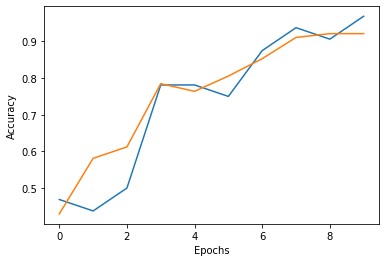

In [25]:
plt.plot(train_history)
plt.plot(test_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

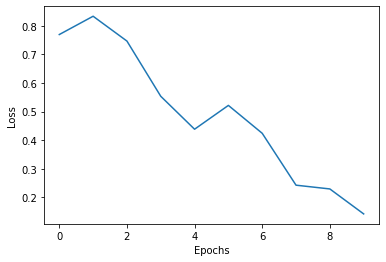

In [26]:
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [27]:
def predict(predict_sentence):

    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tok, vocab, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
    
    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)


        test_eval=[]
        for i in out:
            logits=i
            logits = logits.detach().cpu().numpy()
            #print(logits)

            if np.argmax(logits) == 0:
                test_eval.append("슬픔")
            elif np.argmax(logits) == 1:
                test_eval.append("분노")
        return test_eval[0]

        #print(">> 입력하신 내용에서 " + test_eval[0] + "이 느껴집니다.")

In [40]:
top30=pd.read_csv('./top30_dict.csv',encoding='utf-8')
top30

,singer,title,lyrics,knu,kosac,result,pos
0,NewJeans,Ditto,우스 테이에서 미들 수수께끼를 원하지 않습니다 말해줘 백로라고 말하면 하고 말합니다...,0.500000,0.692308,0.596154,1
1,NewJeans,OMG,노래는 그것 당신에 대해 아이비 만만 힘들 때울 같을 기운도 나지 않을 그것 걱정하...,0.333333,0.437500,0.385417,0
2,NewJeans,Hype boy,아기 미쳤다 빠져버리는 은 당신을 느끼게 했습니다 너도 말해줄래 누가 뭐라 든 남들...,0.666667,0.500000,0.583333,1
3,태양,VIBE (feat. Jimin of BTS),말론 표현할 수 없지만 소녀 분위기를 가지고 있다는 것을 알아야 합니다에 미소는 미...,0.642857,0.562500,0.602679,1
4,윤하 (YOUNHA),사건의 지평선,생각이 많은 건 말이야 당연히 해야 할 일이야 나에겐 우리가 순위야 안전한 유리병을...,0.666667,0.357143,0.511905,1
5,투모로우바이투게더,Sugar Rush Ride,생각은 숨을 멈췄어 돌아올 다짐 따윈 한순간 풀어 헤쳐져 네겐 가까이 오라 속삭여 ...,0.125000,0.615385,0.370192,0
6,부석순 (SEVENTEEN),파이팅 해야지 (Feat. 이영지),파이팅 해야지 파이팅 아뿔싸 일어나야지 아침인데 눈 감았다 뜨니 해가 중천인데 아침...,0.230769,0.454545,0.342657,0
7,LE SSERAFIM (르세라핌),ANTIFRAGILE,가시밭길 위로 라이딩은 향상시켰다 거짓으로 가득 찬 파티 가렵지도 않아내 뒤에 말들...,0.461538,0.315789,0.388664,0
8,NewJeans,Attention,너와 맘이 보이지 한참을 쳐다봐 가까이 다가가 볼 수 있습니다 상용기가 생겼지 이미...,0.833333,0.437500,0.635417,1
9,임영웅,사랑은 늘 도망가,눈물이 난다 길을 걸으면 사람 손길이 생각이 난다 붙잡지 못하고 가슴만 떨었지 아름...,0.444444,0.473684,0.459064,0


In [41]:
top30['predict']='0'
for idx,lyric in enumerate(top30['lyrics']):
  top30['predict'][idx]=predict(lyric)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-41-48ef4f386174>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top30['predict'][idx]=predict(lyric)


In [32]:
top30.to_csv('./top30_pred_neg.csv',encoding='utf-8',index=False)

In [42]:
top30[top30['pos']==0]

,singer,title,lyrics,knu,kosac,result,pos,predict
1,NewJeans,OMG,노래는 그것 당신에 대해 아이비 만만 힘들 때울 같을 기운도 나지 않을 그것 걱정하...,0.333333,0.437500,0.385417,0,슬픔
5,투모로우바이투게더,Sugar Rush Ride,생각은 숨을 멈췄어 돌아올 다짐 따윈 한순간 풀어 헤쳐져 네겐 가까이 오라 속삭여 ...,0.125000,0.615385,0.370192,0,분노
6,부석순 (SEVENTEEN),파이팅 해야지 (Feat. 이영지),파이팅 해야지 파이팅 아뿔싸 일어나야지 아침인데 눈 감았다 뜨니 해가 중천인데 아침...,0.230769,0.454545,0.342657,0,분노
7,LE SSERAFIM (르세라핌),ANTIFRAGILE,가시밭길 위로 라이딩은 향상시켰다 거짓으로 가득 찬 파티 가렵지도 않아내 뒤에 말들...,0.461538,0.315789,0.388664,0,분노
9,임영웅,사랑은 늘 도망가,눈물이 난다 길을 걸으면 사람 손길이 생각이 난다 붙잡지 못하고 가슴만 떨었지 아름...,0.444444,0.473684,0.459064,0,슬픔
12,NCT DREAM,Candy,사탕 사실은 오늘 너와의 만남을 정리하고 싶어널 만날 이해해어렵게 맘 정한 거라네 ...,0.333333,0.631579,0.482456,0,슬픔
16,임영웅,우리들의 블루스,잊지는 말아요 했던 날들 눈물이 때면 그대 뒤를 돌아보면 돼요 아프지 말아요 쓸쓸한...,0.428571,0.350000,0.389286,0,슬픔
17,투모로우바이투게더,Devil by the Window,거짓말 거짓말 거짓말 다운 양의 옷에 늑대를 내려놓으십시오 내부에 숨어있을 것입니다...,0.357143,0.400000,0.378571,0,분노
18,NCT 127,Ay-Yo,준비됐니 닥쳐오는 파란 패러다임 경고 속에 영원했던 존재들의 반전 그것 당신을 위해...,0.411765,0.555556,0.483660,0,분노
19,임영웅,다시 만날 수 있을까,위해 것이 없어서 보낼 수밖에 없었고 없이 사는 법을 알지 못해서 순간순간을 울었다...,0.400000,0.350000,0.375000,0,슬픔
